In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
color = sns.color_palette() # adjusting plotting style

# Dataset overview

<img src="../Dataset/dataset_overview.png">

# Load dataset

In [2]:
# load aisle dataset
aisles = pd.read_csv("../Dataset/aisles.csv")
print("Size of aisles dataset: {}".format(aisles.shape))
print("")
print("AISLE DATATYPES:")
print(aisles.dtypes)
print("")
aisles.head()

Size of aisles dataset: (134, 2)

AISLE DATATYPES:
aisle_id     int64
aisle       object
dtype: object



,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [3]:
# load aisles dataset
aisles = pd.read_csv("../Dataset/aisles.csv")
print("Size of aisles dataset: {}".format(aisles.shape))
print("")
print("AISLE DATATYPES:")
print(aisles.dtypes)
print("")
aisles.head()

Size of aisles dataset: (134, 2)

AISLE DATATYPES:
aisle_id     int64
aisle       object
dtype: object



,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
# load departments dataset
departments = pd.read_csv("../Dataset/departments.csv")
print("Size of departments dataset: {}".format(aisles.shape))
print("")
print("DEPARTMENTS DATATYPES:")
print(departments.dtypes)
print("")
departments.head()

Size of departments dataset: (134, 2)

DEPARTMENTS DATATYPES:
department_id     int64
department       object
dtype: object



,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
# load products dataset
products = pd.read_csv("../Dataset/products.csv")
print("Size of products dataset: {}".format(aisles.shape))
print("")
print("PRODUCTS DATATYPES:")
print(products.dtypes)
print("")
products.head()

Size of products dataset: (134, 2)

PRODUCTS DATATYPES:
product_id        int64
product_name     object
aisle_id          int64
department_id     int64
dtype: object



,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


# Combine datasets together

In [6]:
# combine aisles, departments and products (left joined to products)
products_departments = pd.merge(left=products, right=departments, how="left")
products_departments.head()

,product_id,product_name,aisle_id,department_id,department
0,1,Chocolate Sandwich Cookies,61,19,snacks
1,2,All-Seasons Salt,104,13,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen
4,5,Green Chile Anytime Sauce,5,13,pantry


In [7]:
goods = pd.merge(left=products_departments, right=aisles, how='left')
goods.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation


In [9]:
# to retain '-' and make product names more "standard"
goods["product_name"] = goods["product_name"].str.replace(' ', '_')

# perform lowercase for the text
goods["product_name"] = goods["product_name"].str.lower()
goods.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,chocolate_sandwich_cookies,61,19,snacks,cookies cakes
1,2,all-seasons_salt,104,13,pantry,spices seasonings
2,3,robust_golden_unsweetened_oolong_tea,94,7,beverages,tea
3,4,smart_ones_classic_favorites_mini_rigatoni_wit...,38,1,frozen,frozen meals
4,5,green_chile_anytime_sauce,5,13,pantry,marinades meat preparation


# Plot frequency of departments

In [15]:
# plot frequency of departments
department_count = goods["department"].value_counts()
print(department_count)

personal care      6563
snacks             6264
pantry             5371
beverages          4365
frozen             4007
dairy eggs         3449
household          3085
canned goods       2092
dry goods pasta    1858
produce            1684
bakery             1516
deli               1322
missing            1258
international      1139
breakfast          1115
babies             1081
alcohol            1054
pets                972
meat seafood        907
other               548
bulk                 38
Name: department, dtype: int64


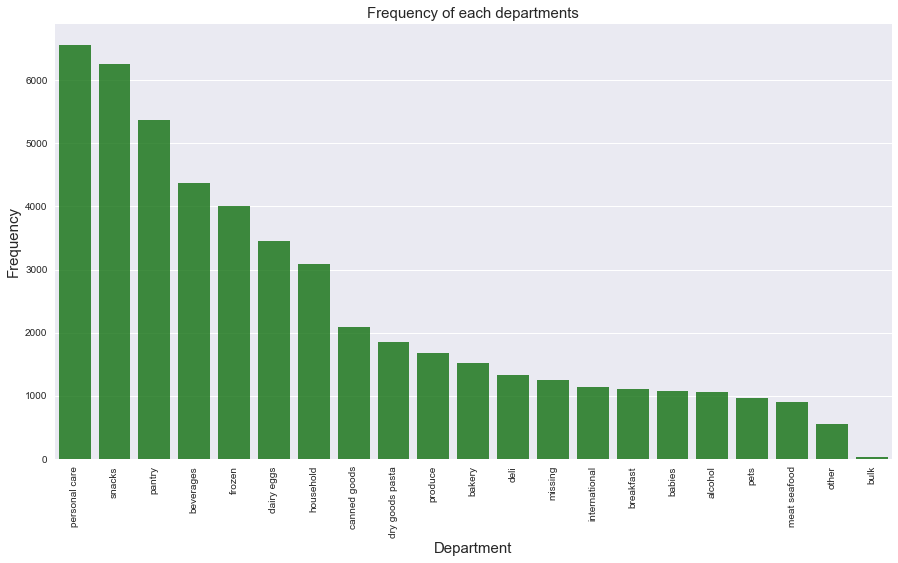

In [20]:
plt.figure(figsize=(15, 8))
sns.barplot(department_count.index, department_count.values, alpha=0.8, color="green")
plt.title("Frequency of each departments", fontsize=15)
plt.xlabel("Department", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.show()

# Plot aisle frequency

In [21]:
# plot frequency of departments
aisle_count = goods["aisle"].value_counts()
print(aisle_count)

missing                          1258
candy chocolate                  1246
ice cream ice                    1091
vitamins supplements             1038
yogurt                           1026
chips pretzels                    989
tea                               894
packaged cheese                   891
frozen meals                      880
cookies cakes                     874
energy granola bars               832
hair care                         816
spices seasonings                 797
juice nectars                     792
crackers                          747
soup broth bouillon               737
baby food formula                 718
coffee                            680
refrigerated                      675
cleaning products                 655
baking ingredients                623
packaged vegetables fruits        615
asian foods                       605
nuts seeds dried fruit            582
fresh vegetables                  569
oral hygiene                      565
salad dressi

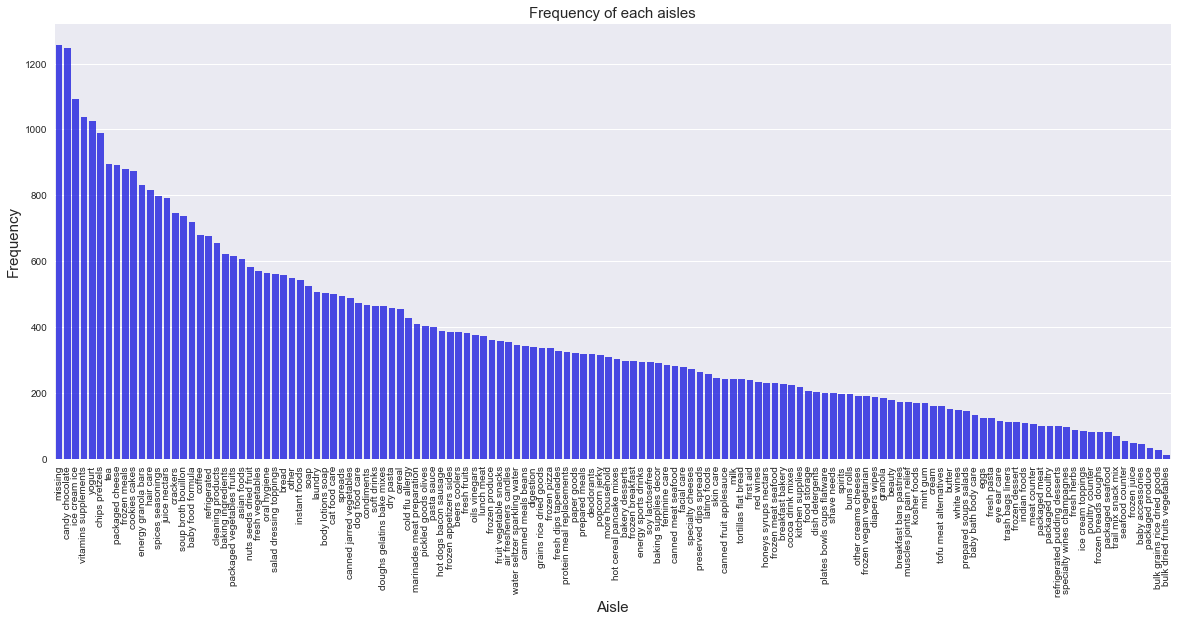

In [29]:
plt.figure(figsize=(20, 8))
sns.barplot(aisle_count.index, aisle_count.values, alpha=0.8, color="blue")
plt.title("Frequency of each aisles", fontsize=15)
plt.xlabel("Aisle", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.show()

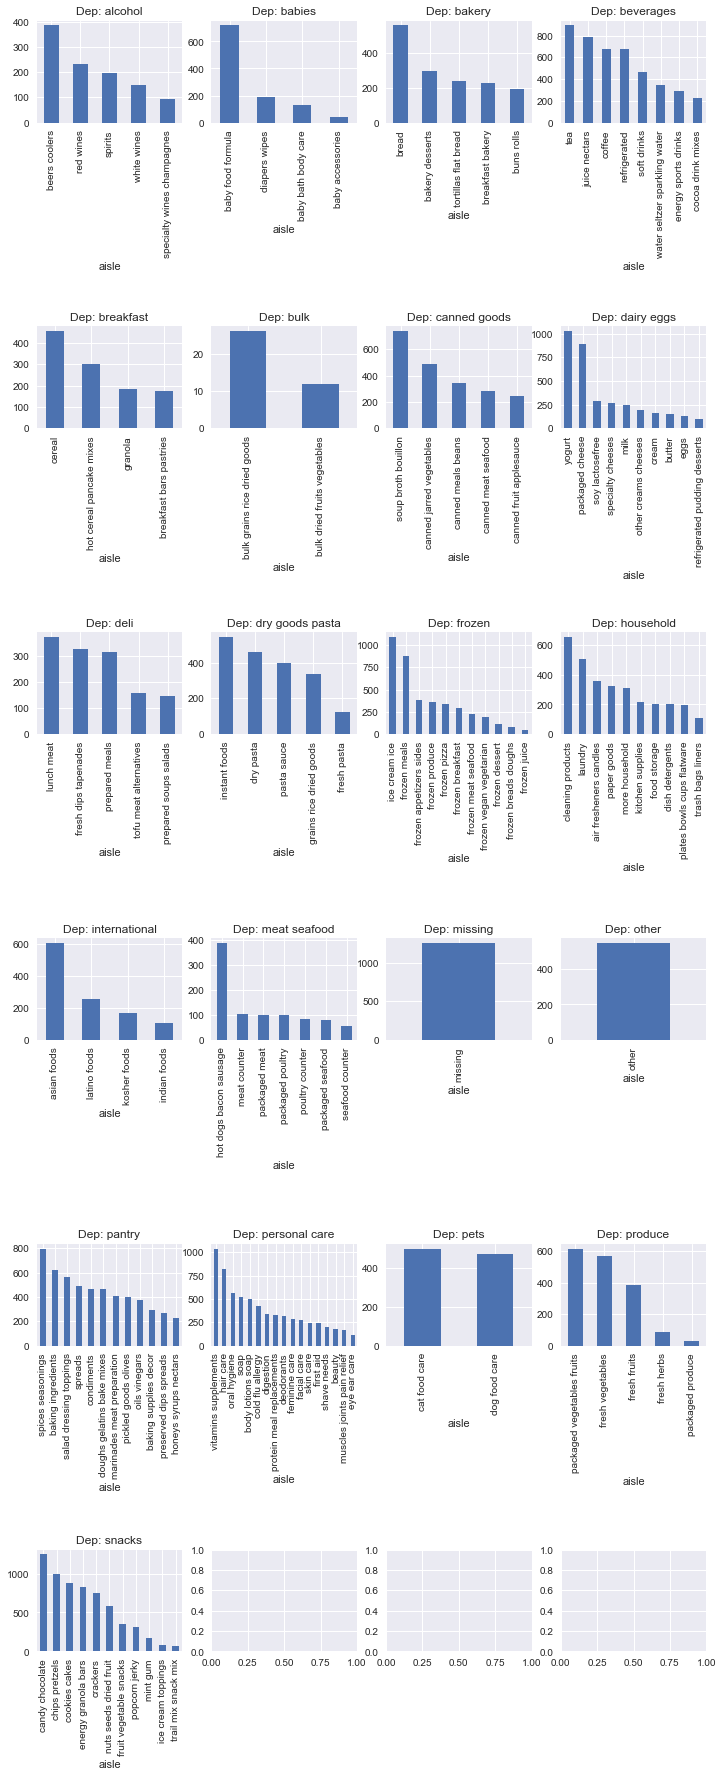

In [30]:
# plot departments volume, split by aisles
f, axarr = plt.subplots(6, 4, figsize=(12, 30))
for i,e in enumerate(departments.department.sort_values(ascending=True)):
    axarr[i//4, i%4].set_title('Dep: {}'.format(e))
    goods[goods.department==e].groupby(['aisle']).count()['product_id']\
    .sort_values(ascending=False).plot(kind='bar', ax=axarr[i//4, i%4])
f.subplots_adjust(hspace=2)

# Main datasets

In [32]:
# order products train dataset
op_train = pd.read_csv("../Dataset/order_products__train.csv")
print("Size of order products training dataset: {}".format(op_train.shape))

Size of order products training dataset: (1384617, 4)


In [33]:
op_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [34]:
# prior dataset
op_prior = pd.read_csv("../Dataset/order_products__prior.csv")
print("Size of order prior dataset: {}".format(op_prior.shape))

Size of order prior dataset: (32434489, 4)


In [35]:
op_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [36]:
# orders dataset
orders = pd.read_csv("../Dataset/orders.csv")
print("Size of orders dataset: {}".format(orders.shape))

Size of orders dataset: (3421083, 7)


In [37]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [40]:
# merge order train and orders dataset
order_merged = pd.merge(left=op_train, right=orders, how="left", on="order_id")

In [41]:
order_merged.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,112108,train,4,4,10,9.0
1,1,11109,2,1,112108,train,4,4,10,9.0
2,1,10246,3,0,112108,train,4,4,10,9.0
3,1,49683,4,0,112108,train,4,4,10,9.0
4,1,43633,5,1,112108,train,4,4,10,9.0


In [42]:
order_merged = pd.merge(left=order_merged, right=goods[["product_id", "aisle_id", "department_id"]], how="left", on="product_id")

In [43]:
order_merged.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id,department_id
0,1,49302,1,1,112108,train,4,4,10,9.0,120,16
1,1,11109,2,1,112108,train,4,4,10,9.0,108,16
2,1,10246,3,0,112108,train,4,4,10,9.0,83,4
3,1,49683,4,0,112108,train,4,4,10,9.0,83,4
4,1,43633,5,1,112108,train,4,4,10,9.0,95,15


More analysis coming soon!